In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models
import pandas as pd
print(np.__version__)

ModuleNotFoundError: No module named 'tensorflow'

In [8]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\KARTHEESVARAN\Downloads\archive (1)\Potato\Train",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE    
)

NameError: name 'tf' is not defined

In [6]:
class_names = dataset.class_names
class_names

NameError: name 'dataset' is not defined

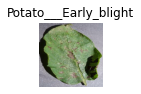

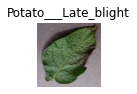

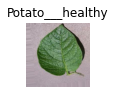

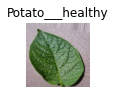

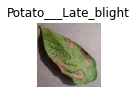

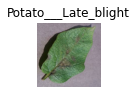

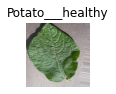

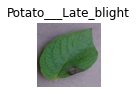

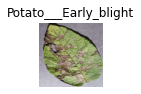

In [17]:

for image_batch, label_batch in dataset.take(1):
    images = image_batch.numpy().astype('int')
    for i in range(9):
        plt.figure(figsize = (4,4))
        plt.subplot(3,3,i+1)
        index = class_names[label_batch[i]]
        plt.axis('off')
        plt.title(index)
        plt.imshow(images[i])


In [18]:
train_size = int(len(dataset)*0.80)
val_size = int(len(dataset)*0.10)
len(dataset)

29

In [19]:
test_ds = dataset.skip(train_size)
train_ds = dataset.take(train_size)
val_ds = test_ds.take(val_size)
test_ds = test_ds.skip(2)
len(test_ds)

4

In [20]:
def get_dataset_partitions(dataset, train_split = 0.8, val_split = 0.1, test_split = 0.1,shuffle = True, shuffle_size = 1000):
    
    dataset_size = len(dataset)
    
    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed = 12)
        
    train_size = int(len(dataset)* train_split)
    val_size = int(len(dataset)* test_split)
    
    train_ds = dataset.take(train_size)
    val_ds = dataset.skip(train_size).take(val_size)
    test_ds = dataset.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [21]:
train_ds, val_ds, test_ds = get_dataset_partitions(dataset)

In [22]:
train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size = tf.data.experimental.AUTOTUNE)
val_ds= val_ds.cache().shuffle(100).prefetch(buffer_size = tf.data.experimental.AUTOTUNE)
test_ds = test_ds.cache().shuffle(100).prefetch(buffer_size = tf.data.experimental.AUTOTUNE)

In [23]:

resize = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255)
])



In [25]:
data_augumentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal'),
    layers.experimental.preprocessing.RandomRotation(0.3),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

In [28]:
#input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
model = models.Sequential([
    resize,
    #data_augumentation,
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3)),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(3,activation='softmax')
])
model.build(input_shape = input_shape)

In [29]:
model.compile(loss = 'SparseCategoricalCrossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (32, 125, 125, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (32, 62, 62, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (32, 123008)              0         
_________________________________________________________________
dense_1 (Dense)              (32, 3)                  

In [31]:
history = model.fit(train_ds,
         epochs = 20,
         batch_size = BATCH_SIZE,
         verbose = 1,
         validation_data = val_ds)

Epoch 1/20
23/23 [==============================] - 34s 1s/step - loss: 3.3645 - accuracy: 0.3701 - val_loss: 0.7029 - val_accuracy: 0.6562
Epoch 2/20
23/23 [==============================] - 30s 1s/step - loss: 0.6569 - accuracy: 0.7062 - val_loss: 0.4760 - val_accuracy: 0.8281
Epoch 3/20
23/23 [==============================] - 31s 1s/step - loss: 0.4076 - accuracy: 0.8404 - val_loss: 0.3283 - val_accuracy: 0.8906
Epoch 4/20
23/23 [==============================] - 30s 1s/step - loss: 0.2747 - accuracy: 0.9138 - val_loss: 0.2638 - val_accuracy: 0.8750
Epoch 5/20
23/23 [==============================] - 30s 1s/step - loss: 0.2017 - accuracy: 0.9435 - val_loss: 0.1847 - val_accuracy: 0.9219
Epoch 6/20
23/23 [==============================] - 31s 1s/step - loss: 0.1575 - accuracy: 0.9605 - val_loss: 0.1503 - val_accuracy: 0.9688
Epoch 7/20
23/23 [==============================] - 32s 1s/step - loss: 0.1195 - accuracy: 0.9760 - val_loss: 0.1011 - val_accuracy: 0.9844
Epoch 8/20
23/23 [==

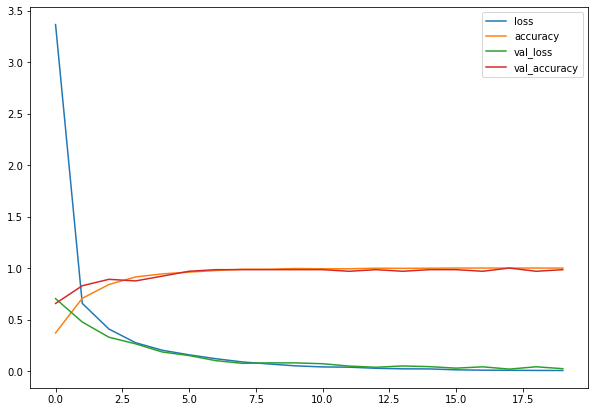

In [32]:
def plot(history):
   pd.DataFrame(history.history).plot(figsize = (10,7))
plot(history)

In [33]:
model.predict(test_ds)

array([[1.39362022e-10, 1.45657559e-05, 9.99985456e-01],
       [6.26991659e-09, 5.92062279e-05, 9.99940753e-01],
       [3.88026168e-03, 9.93372560e-01, 2.74724350e-03],
       [5.54008253e-08, 8.36657302e-04, 9.99163270e-01],
       [9.99999881e-01, 1.50538440e-07, 1.62304853e-15],
       [7.86309158e-07, 7.91830462e-05, 9.99920011e-01],
       [9.99975801e-01, 2.42360438e-05, 3.19327830e-14],
       [9.99992132e-01, 7.83297583e-06, 1.57482719e-18],
       [4.90712591e-05, 9.95812953e-01, 4.13797237e-03],
       [5.15513308e-03, 9.94844794e-01, 1.73447972e-07],
       [4.00604131e-06, 9.99995947e-01, 2.41969094e-08],
       [9.91054118e-01, 8.94277263e-03, 3.07242499e-06],
       [9.90318298e-01, 9.68171656e-03, 3.77579357e-10],
       [2.97274170e-08, 5.07436751e-04, 9.99492526e-01],
       [9.99935031e-01, 6.50239526e-05, 2.24796879e-13],
       [5.07714867e-05, 5.38161755e-01, 4.61787552e-01],
       [5.80482744e-03, 9.91946042e-01, 2.24914961e-03],
       [2.33572536e-11, 8.15089

In [34]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\KARTHEESVARAN\Downloads\archive (1)\Potato\Test",
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    shuffle = True
)

Found 300 files belonging to 3 classes.


Predicted : Potato___Early_blight


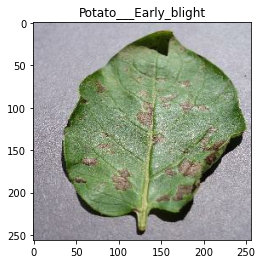

In [37]:
for image_batch,label_batch in dataset.take(1):
    images = image_batch.numpy().astype('int')
    for i in range(1):
        plt.title(class_names[label_batch[i]])
        plt.imshow(images[i])
        index = model.predict(tf.expand_dims(images[i],0))
        result = class_names[np.argmax(index[0])]
        print(f"Predicted : {result}")

In [40]:
model.save(r'C:\Users\KARTHEESVARAN\OneDrive\Downoads\potato disease')

INFO:tensorflow:Assets written to: C:\Users\KARTHEESVARAN\OneDrive\Downoads\potato disease\assets


In [10]:
history.params

NameError: name 'history' is not defined

In [336]:
model_version = 1
model.save(fr'C:\Users\KARTHEESVARAN\OneDrive\Desktop\potato disease/{model_version}')

INFO:tensorflow:Assets written to: C:\Users\KARTHEESVARAN\OneDrive\Desktop\potato disease/1\assets


INFO:tensorflow:Assets written to: C:\Users\KARTHEESVARAN\OneDrive\Desktop\potato disease/1\assets
